In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mglearn

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#generate data set
X,y = mglearn.datasets.make_wave(n_samples = 40)

In [5]:
#split to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [6]:
#Instantiate the model and set the number of neighbors to consider to 3
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors = 3)

#fit the model using the training and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [7]:
print("Test set predictions : \n{}".format(reg.predict(X_test)))

Test set predictions : 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [8]:
print("Test set R^2 : {:2f}".format(reg.score(X_test, y_test)))

Test set R^2 : 0.834417


<h3>Analyzing KNNRegressor</h3>

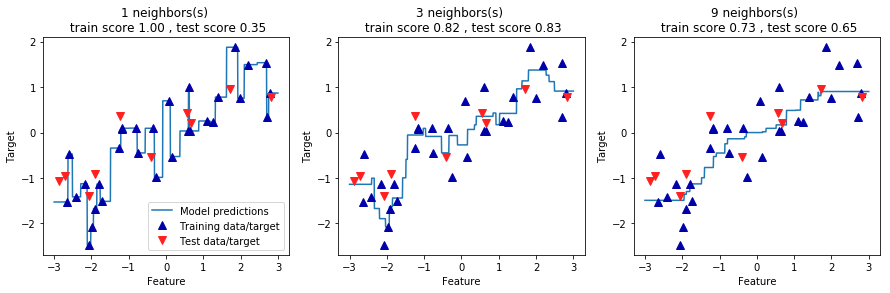

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#create 1000 data points evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip ([1, 3, 9], axes):
    #make predictions using 1, 3 or 9 neighbors 
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
        "{} neighbors(s) \n train score {:.2f} , test score {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
    axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc = "best")